In [1]:
from urllib.request import urlopen, Request

In [2]:
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd

In [3]:
finviz_url='https://finviz.com/quote.ashx?t='

In [4]:
tickers=['AMZN','GOOGL','META']

In [5]:
news_tables={}

In [36]:
for ticker in tickers:
    url=finviz_url+ticker
    
    req=Request(url=url,headers={'user-agent':'my-app'})
    response=urlopen(req)
    
    html=BeautifulSoup(response,'html')
    news_table=html.find(id='news-table')
    news_tables[ticker]=news_table
    

    
    #break
print(news_tables)    

{'AMZN': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Aug-13-22 06:45AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/08/13/missed-out-faang-stocks-buy-cash-stocks-instead/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">Missed Out on the FAANG Stocks? Buy the CASH Stocks Instead.</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" style="white-space:nowrap" width="130">Aug-12-22 06:11PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.wsj.com/articles/youtube-advances-plans-for-streaming-video-marketplace-11660341418?siteid=yhoof2

In [37]:
AMZN_data=news_tables['AMZN']
AMZN_rows=AMZN_data.findAll('tr')

print(AMZN_rows)

[<tr><td align="right" style="white-space:nowrap" width="130">Aug-13-22 06:45AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/08/13/missed-out-faang-stocks-buy-cash-stocks-instead/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">Missed Out on the FAANG Stocks? Buy the CASH Stocks Instead.</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>, <tr><td align="right" style="white-space:nowrap" width="130">Aug-12-22 06:11PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.wsj.com/articles/youtube-advances-plans-for-streaming-video-marketplace-11660341418?siteid=yhoof2" target="_blank">YouTube Advances Plans for Streaming Video Marketplace</a></div><div class="news-link-right"><spa

In [38]:

#for scraping titles:

#for index,row in enumerate(AMZN_rows):
    
 #   title=row.a.text
    
    
#for scraping timestamps:

 #   timestamp=row.td.text

 #   print(timestamp+' '+title)    

In [39]:
parsed_data=[]

for ticker,news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title=row.a.get_text()
        
        date_data=row.td.text.split(' ')
        
        if len(date_data)==1:
            time=date_data[0]
        else:
            date=date_data[0]
            time=date_data[1]
            
        parsed_data.append([ticker, date, time, title])
        
print(parsed_data)        

[['AMZN', 'Aug-13-22', '06:45AM\xa0\xa0', 'Missed Out on the FAANG Stocks? Buy the CASH Stocks Instead.'], ['AMZN', 'Aug-12-22', '06:11PM\xa0\xa0', 'YouTube Advances Plans for Streaming Video Marketplace'], ['AMZN', 'Aug-12-22', '05:54PM\xa0\xa0', 'The Big Winnersand Losers in the Inflation Bill'], ['AMZN', 'Aug-12-22', '05:51PM\xa0\xa0', 'Tesla, Amazon Are in Line for a Tax Hit From Inflation Reduction Act'], ['AMZN', 'Aug-12-22', '05:22PM\xa0\xa0', 'Trader Joes Employees at Minneapolis Store Vote for Union'], ['AMZN', 'Aug-12-22', '05:06PM\xa0\xa0', '3 Safe Industrial Stocks That Will Pay You Passive Income for Years'], ['AMZN', 'Aug-12-22', '03:40PM\xa0\xa0', 'Tesla, Amazon Are in Line for a Tax Hit From Inflation Reduction Act'], ['AMZN', 'Aug-12-22', '01:36PM\xa0\xa0', '6 Software Stocks to Buy and 4 to Sell, According to an Analyst'], ['AMZN', 'Aug-12-22', '01:03PM\xa0\xa0', 'Can Amazon and Apple Continue to Lead Stocks Higher?'], ['AMZN', 'Aug-12-22', '12:00PM\xa0\xa0', 'Why Ank

In [40]:
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])

In [41]:
print(df.head())

  ticker       date       time  \
0   AMZN  Aug-13-22  06:45AM     
1   AMZN  Aug-12-22  06:11PM     
2   AMZN  Aug-12-22  05:54PM     
3   AMZN  Aug-12-22  05:51PM     
4   AMZN  Aug-12-22  05:22PM     

                                               title  
0  Missed Out on the FAANG Stocks? Buy the CASH S...  
1  YouTube Advances Plans for Streaming Video Mar...  
2    The Big Winnersand Losers in the Inflation Bill  
3  Tesla, Amazon Are in Line for a Tax Hit From I...  
4  Trader Joes Employees at Minneapolis Store Vot...  


In [43]:
vader=SentimentIntensityAnalyzer()

f= lambda title: vader.polarity_scores(title)['compound']

df['compound']=df['title'].apply(f)


In [28]:
# Visualization

In [44]:
df['date']=pd.to_datetime(df.date).dt.date

In [45]:
import matplotlib.pyplot as plt

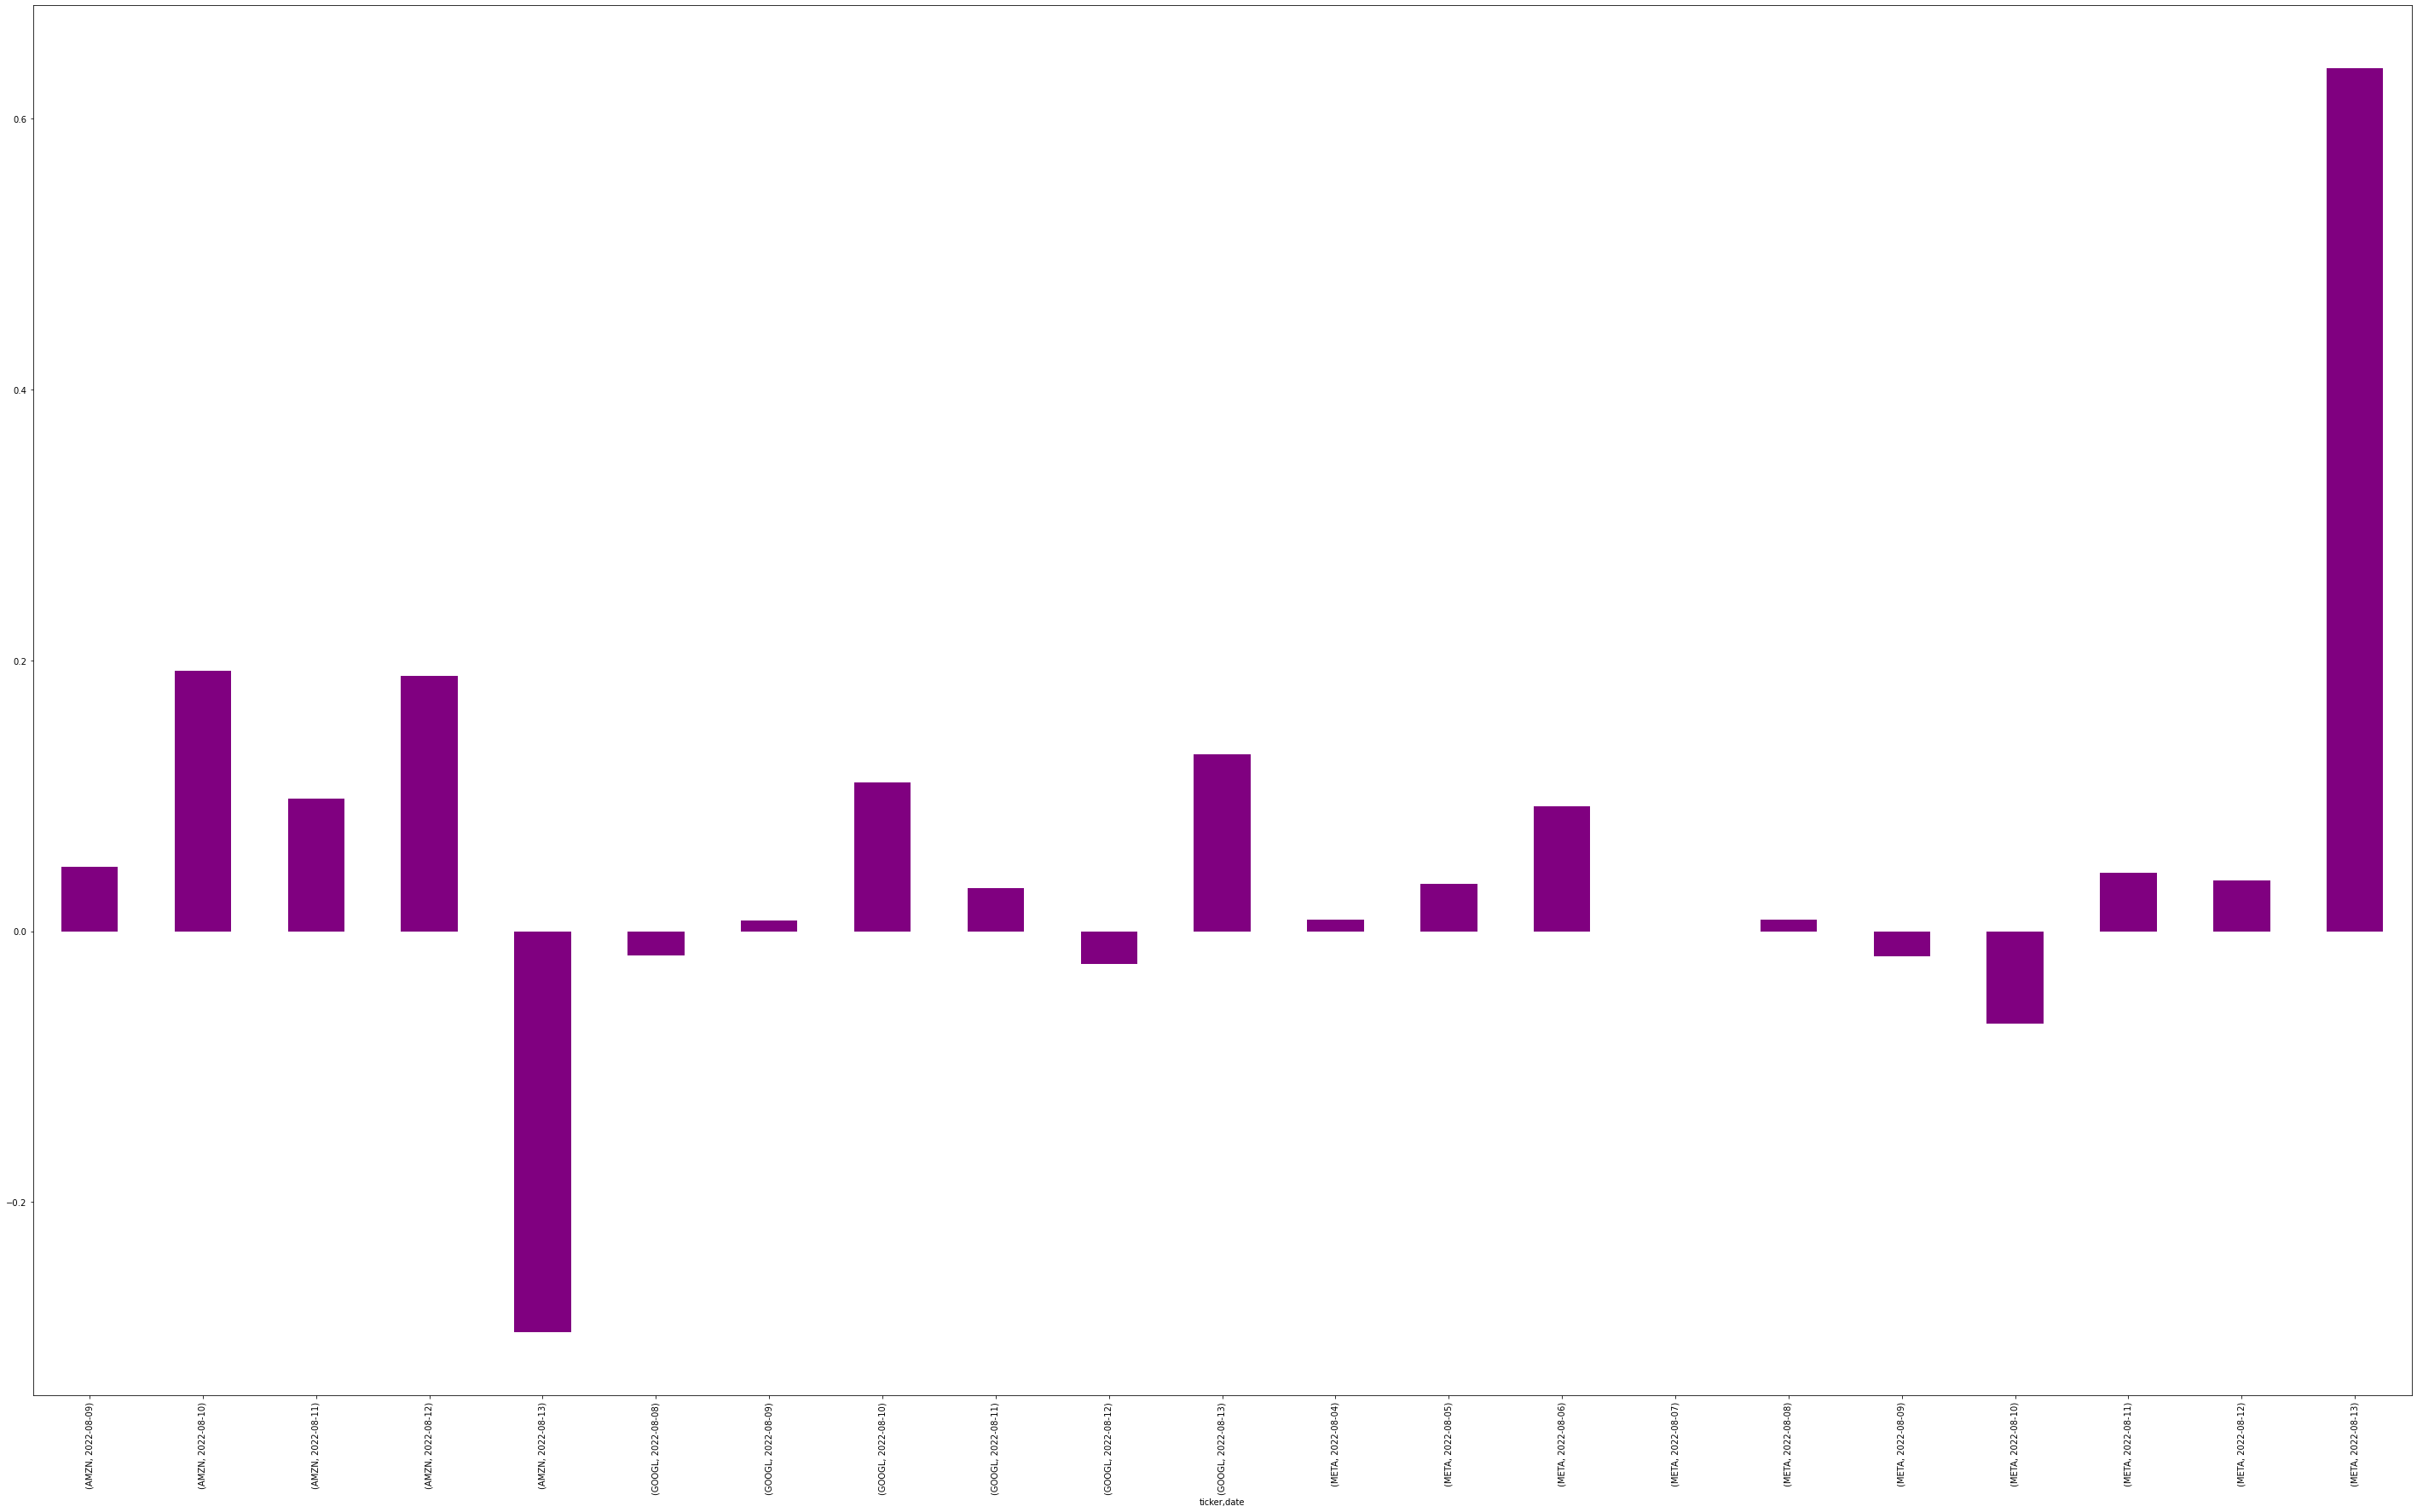

ticker  date      
AMZN    2022-08-09    0.047316
        2022-08-10    0.192493
        2022-08-11    0.097862
        2022-08-12    0.188658
        2022-08-13   -0.296000
GOOGL   2022-08-08   -0.017855
        2022-08-09    0.008104
        2022-08-10    0.110067
        2022-08-11    0.031817
        2022-08-12   -0.024211
        2022-08-13    0.130700
META    2022-08-04    0.008418
        2022-08-05    0.034784
        2022-08-06    0.091900
        2022-08-07    0.000000
        2022-08-08    0.008450
        2022-08-09   -0.018827
        2022-08-10   -0.068008
        2022-08-11    0.043146
        2022-08-12    0.037557
        2022-08-13    0.636900
Name: compound, dtype: float64


In [58]:
plt.figure(figsize=(50,30))

mean_df=df.groupby(['ticker','date']).mean()

meand_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis='columns').transpose()

mean_df.plot(kind='bar',color='purple')
plt.show()

print(mean_df)